# Haverman's Survival DataSet

## Brief Description : 
The Haberman's survival dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

## Attributes :
* Age of patient at time of operation (numerical)
* Patient's year of operation (year - 1900, numerical)
* Number of positive axillary nodes detected (numerical)
* Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year

## Objective :
To predict whether the breast cancer patient will survive after 5 years based upon features like patient's age, year of treatment and the number of positive axillary lymph nodes.

In [1]:
# importing packages for later use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

## 1. Data fetching

In [2]:
# Here I'm fetching data from 'haberman.csv' file
suv_data = pd.read_csv('haberman.csv', names=['age', 'operation_year', 'axillary_nodes', 'survived_5_years'], header = None)
print(suv_data.head())

   age  operation_year  axillary_nodes  survived_5_years
0   30              64               1                 1
1   30              62               3                 1
2   30              65               0                 1
3   31              59               2                 1
4   31              65               4                 1


## 2. Data Preparation

In [3]:
suv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age                 306 non-null int64
operation_year      306 non-null int64
axillary_nodes      306 non-null int64
survived_5_years    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [4]:
"""
1. As here the column 'survived_5_years' have data in integer format that will create problem while distinguishing
   classes.
2. So, I'm conerting data to string and the data type as categoty.
"""
# Assigning 'yes' to 1 and 'no' to 0 in column 'survived_5_years'.
suv_data['survived_5_years'] = suv_data['survived_5_years'].apply(lambda x: 'yes' if x == 1 else 'no')
# Converting data type to category
suv_data['survived_5_years'] = suv_data['survived_5_years'].astype('category')
# Reading top 5 recors of dataset
print(suv_data.head())

   age  operation_year  axillary_nodes survived_5_years
0   30              64               1              yes
1   30              62               3              yes
2   30              65               0              yes
3   31              59               2              yes
4   31              65               4              yes


In [5]:
suv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age                 306 non-null int64
operation_year      306 non-null int64
axillary_nodes      306 non-null int64
survived_5_years    306 non-null category
dtypes: category(1), int64(3)
memory usage: 7.6 KB


### Observation :
* There are four colums in this dataset three of them are integer and one is category type.
* The column 'survived_5_years' have 2 classes they are : 'yes' and 'no'. These two signifies that the patient is alive or not after five years.

## 3. High level statistics

In [6]:
print("No. of points : ",suv_data.shape[0])
print("No. of features : ",suv_data.shape[1])
print("No. of classes : ", suv_data['survived_5_years'].describe().unique()[1])

No. of points :  306
No. of features :  4
No. of classes :  2


In [7]:
print("Data points per class : ")
print(suv_data['survived_5_years'].value_counts())
print("\nData point distribution percentage per class:")
print(suv_data['survived_5_years'].value_counts(normalize=True))

Data points per class : 
yes    225
no      81
Name: survived_5_years, dtype: int64

Data point distribution percentage per class:
yes    0.735294
no     0.264706
Name: survived_5_years, dtype: float64


In [8]:
suv_data.describe()

,age,operation_year,axillary_nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


### Observarion : 
* This dataset contains medical record of 306 patients.
* These patients age vary from 30 to 83. 
* There are higher chances of breast cancer to women in their 50's (i.e. more precisely in age of 52).
* Approximately 75% of patients have less than 5 positive lymph nodes and nearly 25% of the patients have no positive lymph nodes.
* After the 5 years of the operation 225 people are alive and 81 people have died.
* This dataset is a imbalanced dataset because 73% people belongs to the surviver class.

## 4. Univariate Analysis

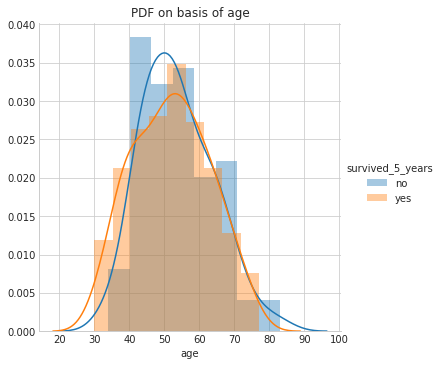

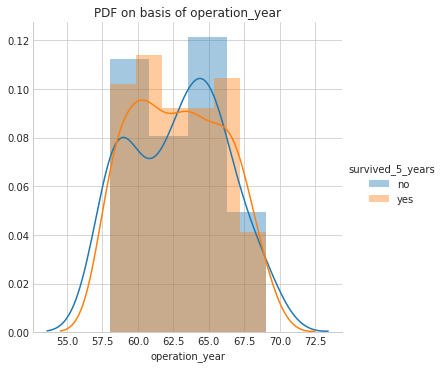

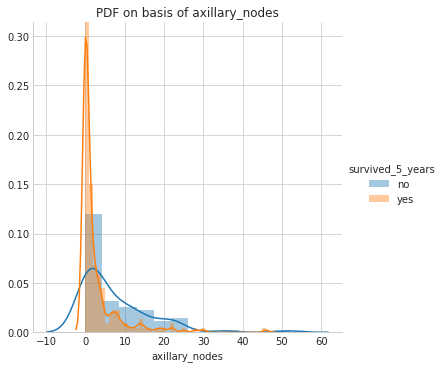

In [14]:
# Histogram/Density Plot and PDF
"""
Through histogram we can get density of data through height in a certain data point.
PDF is the smooth histogram.
Below the bars are histogram and the lines are PDF.
"""
for feature in list(suv_data.columns[:-1]):
    sb.FacetGrid(suv_data, hue='survived_5_years', size=5)\
    .map(sb.distplot, feature)\
    .add_legend()
    plt.title('PDF on basis of '+feature)
    plt.show()


 age :

BIN Width :  [30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
PDF :  [0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
CDF :  [0.05333333 0.16       0.28444444 0.37777778 0.54222222 0.70666667
 0.8        0.91111111 0.97333333 1.        ]

 operation_year :

BIN Width :  [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
PDF :  [0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
CDF :  [0.18666667 0.29333333 0.39555556 0.46666667 0.56444444 0.66666667
 0.73333333 0.83111111 0.92444444 1.        ]

 axillary_nodes :

BIN Width :  [ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
PDF :  [0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
CDF :  [0.83555556 0.91555556 0.93777778 0.96444444 0.98222222 0.98666667
 0.99555556 0.99555556 0.99555556 1.        ]

 *******************

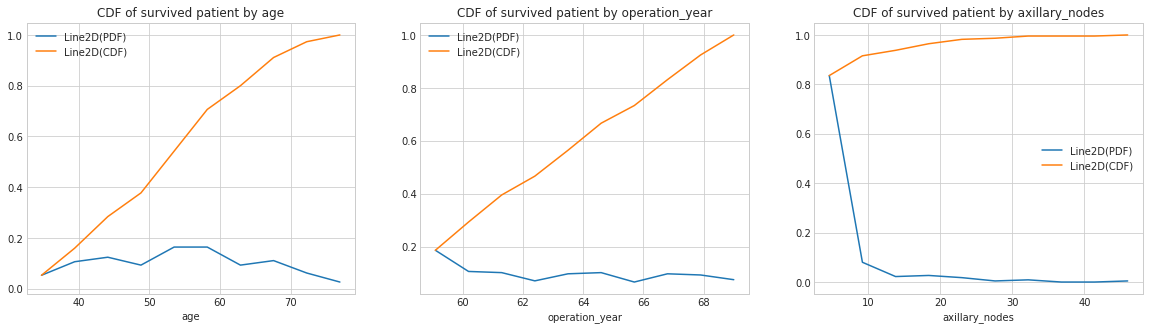


 age :

BIN Width :  [34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]
PDF :  [0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
CDF :  [0.03703704 0.16049383 0.35802469 0.55555556 0.69135802 0.81481481
 0.91358025 0.96296296 0.98765432 1.        ]

 operation_year :

BIN Width :  [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
PDF :  [0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
CDF :  [0.25925926 0.30864198 0.34567901 0.43209877 0.5308642  0.62962963
 0.79012346 0.86419753 0.91358025 1.        ]

 axillary_nodes :

BIN Width :  [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
PDF :  [0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
CDF :  [0.56790123 0.71604938 0.85185185 0.90123457 0.97530864 0.97530864
 0.98765432 0.98765432 0.98765432 1.        ]

 ***************************

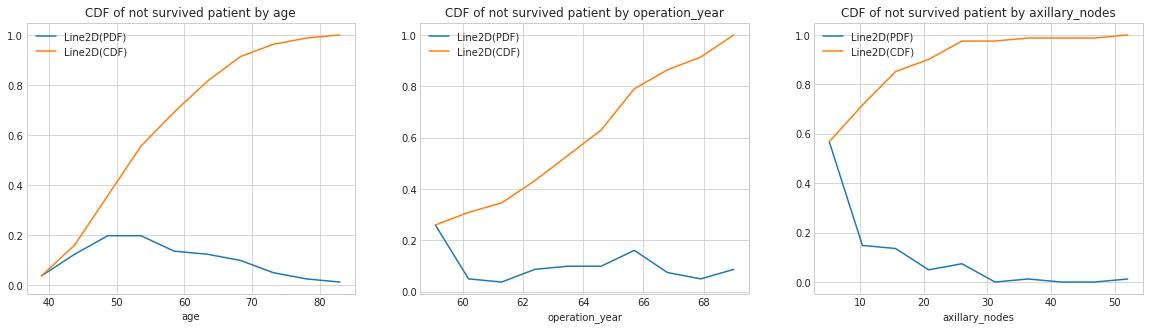

In [15]:
plt.close()# This line of code releses the memory that have been occupied by previous plot.

# CDF plot
"""
CDF is the integration of PDF
"""
# This list stores the data of patients who are alive.
surv_yes = suv_data.loc[suv_data["survived_5_years"] == "yes"];
# This list stores the data of patients who are dead.
surv_no = suv_data.loc[suv_data["survived_5_years"] == "no"];

# CDF plot for all features from list of alive patients.
plt.figure(figsize=(20,5))
for index, feature in enumerate(list(suv_data.columns[:-1])):
    plt.subplot(1, 3, index+1)
    counts, bin_edges = np.histogram(surv_yes[feature],\
                                     bins=10, density = True)
    pdf = counts/(sum(counts))
    print("\n",feature,":\n")
    print("BIN Width : ",bin_edges);
    print("PDF : ",pdf);
    cdf = np.cumsum(pdf)
    print("CDF : ",cdf);
    pdf, = plt.plot(bin_edges[1:],pdf,label='PDF')
    cdf, = plt.plot(bin_edges[1:], cdf,label='CDF')
    plt.xlabel(feature)
    plt.legend([pdf, cdf])
    plt.title('CDF of survived patient by '+feature)
print("\n","*"*45,"CDF of survived patient.","*"*45)
plt.show()

# CDF plot for all features from list of dead patients.
plt.figure(figsize=(20,5))
for index, feature in enumerate(list(suv_data.columns[:-1])):
    plt.subplot(1, 3, index+1)
    counts, bin_edges = np.histogram(surv_no[feature],\
                                     bins=10, density = True)
    pdf = counts/(sum(counts))
    print("\n",feature,":\n")
    print("BIN Width : ",bin_edges);
    print("PDF : ",pdf);
    cdf = np.cumsum(pdf)
    print("CDF : ",cdf);
    pdf, = plt.plot(bin_edges[1:],pdf,label='PDF')
    cdf, = plt.plot(bin_edges[1:], cdf,label='CDF')
    plt.xlabel(feature)
    plt.legend([pdf, cdf])
    plt.title('CDF of not survived patient by '+feature)
print("\n","*"*45,"CDF of not survived patient.","*"*45)
plt.show()

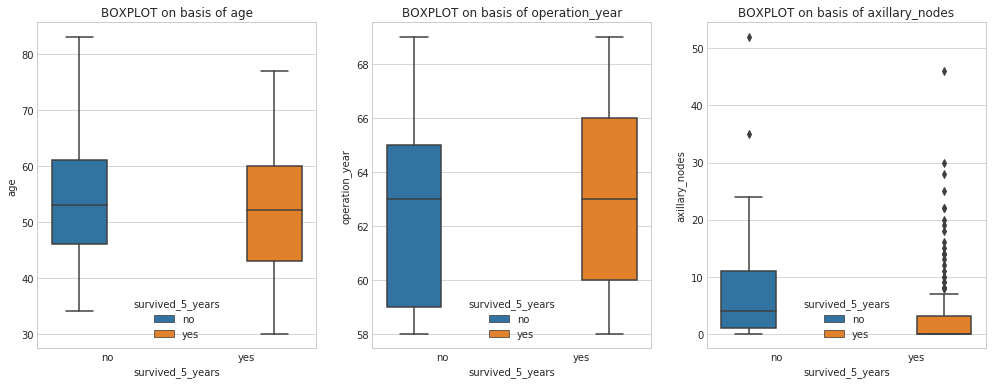

In [16]:
plt.close()

# BOX PLOT
fig, axes = plt.subplots(1, 3, figsize=(17,6))
for index, feature in enumerate(list(suv_data.columns[:-1])):
    sb.boxplot( x='survived_5_years', y=feature, data=suv_data, ax=axes[index], hue='survived_5_years')\
    .set_title('BOXPLOT on basis of '+feature)
plt.show()

### Observation :
* Almost 85% of the patients have less than or equal to 5(i.e. 0-5) positive axillary lymph node. 
* There is a higher chance of survival if the operation have done in the age 30 to early 40's.
* Survival rate slightly increases after year of 1995 compared to before.

## 5. Bivariate analysis

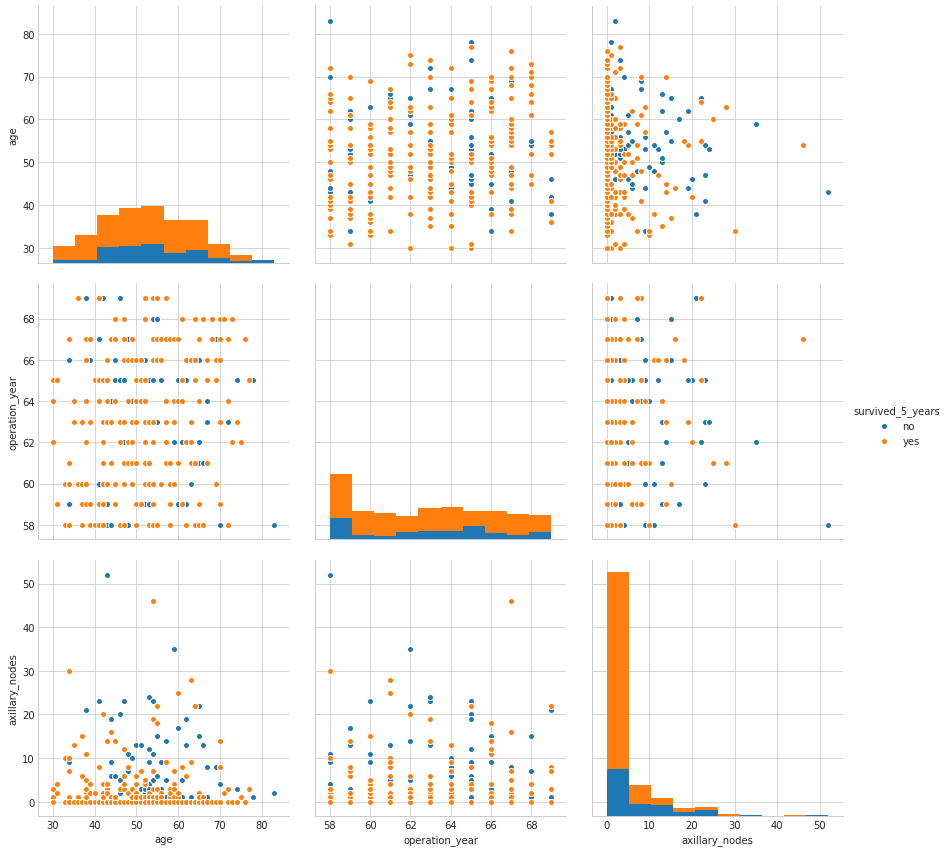

In [18]:
# Pair plots
sb.pairplot(suv_data, hue = 'survived_5_years', size=4)
plt.show()

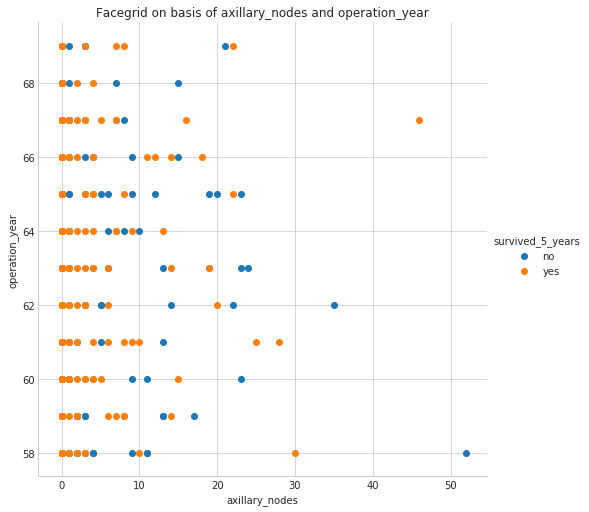

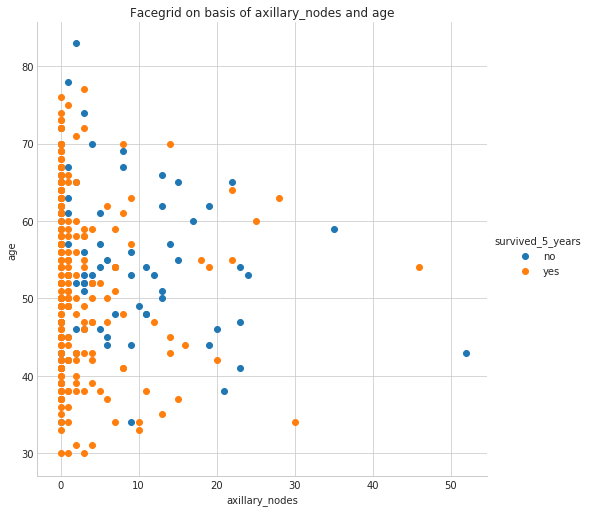

In [23]:
# SCATTERPLOT for features for better classification

sb.set_style("whitegrid")
sb.FacetGrid(suv_data, hue="survived_5_years", size=7) \
   .map(plt.scatter, "axillary_nodes", "operation_year") \
   .add_legend()
plt.title('Facegrid on basis of axillary_nodes and operation_year')

sb.FacetGrid(suv_data, hue="survived_5_years", size=7) \
   .map(plt.scatter, "axillary_nodes", "age") \
   .add_legend()
plt.title('Facegrid on basis of axillary_nodes and age')
plt.show()

## Conclusion : 
By scattering the data points between {operation_year, axillary_nodes} and {age, axillary_nodes}, we can see the better classification between the two clases than other scatter plots.

                                               <> @devbox <>